In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import pathlib
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax, RMSprop, SGD, Adadelta
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.activations import relu,tanh,sigmoid
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from IPython.display import Image

from datetime import datetime
from packaging import version

# DATA PREPARATION <a class='anchor' id='DP'></a>
## DATA Initialization <a class='anchor' id='DI'></a>

In [5]:
closed_dir = '/kaggle/input/eye-dataset/Eye dataset/close_look'
forward_dir = '/kaggle/input/eye-dataset/Eye dataset/forward_look'
left_dir = '/kaggle/input/eye-dataset/Eye dataset/left_look'
right_dir = '/kaggle/input/eye-dataset/Eye dataset/right_look'

labels_lst = ['closed', 'forward', 'right', 'left']
class get_data():
    
#     Parameters are paths
#     closed_dir : closed eye directory
#     forward_dir : forward-looking eye directory
#     left_dir : left-looking eye directory
#     right_dir : right-looking eye directory
    
    def __init__(self, closed_dir, forward_dir, left_dir, right_dir):
        self.closed_dir = closed_dir
        self.forward_dir = forward_dir
        self.left_dir = left_dir
        self.right_dir = right_dir
    
    def get_paths():
        closed = []
        forward = []
        left = []
        right = []
        labels = []
        images = []
        for dirname, _, filenames in os.walk('/kaggle/input'):
            for filename in filenames:
                image = cv.imread(os.path.join(dirname, filename))
                if dirname == closed_dir:
                    if image is not None:
                        closed.append(image)
                        images.append(image)
                        labels.append(0)
                    else:
                        print(f"Failed to load image: {os.path.join(dirname, filename)}") 
                elif dirname == forward_dir:
                    if image is not None:
                        forward.append(image)
                        images.append(image)
                        labels.append(1)
                    else:
                        print(f"Failed to load image: {os.path.join(dirname, filename)}")
                elif dirname == left_dir:
                    if image is not None:
                        left.append(image)
                        images.append(image)
                        labels.append(2)
                    else:
                        print(f"Failed to load image: {os.path.join(dirname, filename)}")
                elif dirname == right_dir:
                    if image is not None:
                        right.append(image)
                        images.append(image)
                        labels.append(3)
                    else:
                        print(f"Failed to load image: {os.path.join(dirname, filename)}")
        return closed, forward, left, right, labels, images

In [6]:
get_data(closed_dir, forward_dir, left_dir, right_dir)  # Class initialization
closed, forward, left, right, labels, images = get_data.get_paths()   # Data initialization using class function

## Sample data <a class='anchor' id='SD'></a>

In [9]:
def show_classes():    
    index = randint(0, 3456)
    plt.subplot(141),plt.imshow(forward[index])
    plt.subplot(142),plt.imshow(closed[index])
    plt.subplot(143),plt.imshow(left[index])
    plt.subplot(144),plt.imshow(right[index])

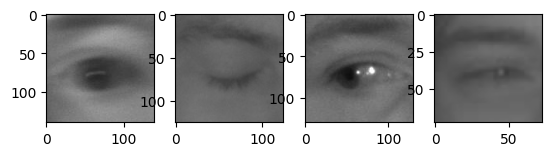

In [10]:
show_classes()

In [11]:
def show_classes_with_labels(images, labels):    
    for i in range(1,5):
        index = randint(0, len(images))
        plt.subplot(140+i), plt.imshow(images[index]), plt.title(labels[index])

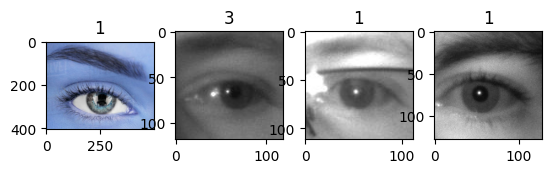

In [12]:
show_classes_with_labels(images, labels)

## IMAGE PREPROCESSING <a class='anchor' id='IPP'></a>


## Image Resize  <a class='anchor' id='IR'></a>

In [13]:
for image in range(len(images)):
    images[image] = cv.resize(images[image],(60,60), interpolation=cv.INTER_CUBIC)

## Train-Test-Split  <a class='anchor' id='TTS'></a>

In [14]:
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size=0.20, random_state=73)

## Scaling <a class='anchor' id='SC'></a>

In [15]:
def scaling(x_train, x_test):
    x_train_arr = np.array(x_train)
    x_test_arr = np.array(x_test)
    
    x_train_arr = x_train_arr.astype(np.float64)
    x_train_arr = x_train_arr / 255.0
    x_test_arr = x_test_arr.astype(np.float64)
    x_test_arr = x_test_arr / 255.0
    
    print('The shape of the train and test data respectively',x_train_arr.shape, x_test_arr.shape)
    print('The RGB of a sample image of the train and the test data respectively (if the RGB values between 0 and 1 then it has been scaled successfully)\n', x_train_arr[0,0,0], x_test_arr[0,0,0])
    return x_train_arr, x_test_arr

In [16]:
x_train, x_test = scaling(x_train, x_test)

The shape of the train and test data respectively (11488, 60, 60, 3) (2872, 60, 60, 3)
The RGB of a sample image of the train and the test data respectively (if the RGB values between 0 and 1 then it has been scaled successfully)
 [0.43137255 0.43137255 0.43137255] [0.42352941 0.42352941 0.42352941]


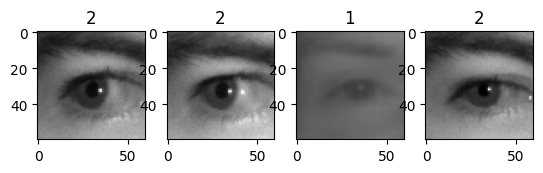

In [17]:
show_classes_with_labels(x_train, y_train)    # reassure the images are clear after preprocessing in train data

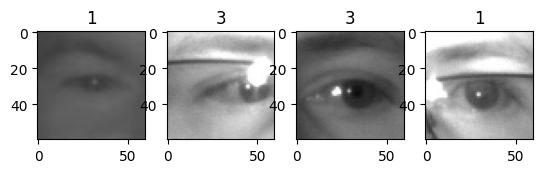

In [18]:
show_classes_with_labels(x_test, y_test)     # reassure the images are clear after preprocessing in test data

## Categorizing Labels fo the model  <a class='anchor' id='CAT'></a>

In [19]:
y_train = to_categorical(y_train,4)
y_test =to_categorical(y_test,4)

In [20]:
y_train[0], y_test[0]

(array([0., 0., 0., 1.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32))

In [82]:
def train_model(model):
    model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

## Model <a class='anchor' id='DL2'></a>

In [28]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(60, 60, 3)))
model2.add(BatchNormalization())

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Flatten())

model2.add(Dense(512, activation='leaky_relu'))

model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(128, activation='relu'))

model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(4, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [86]:
train_model(model2)

Epoch 1/10
359/359 [==============================] - 5s 13ms/step - loss: 0.0571 - accuracy: 0.9822 - val_loss: 0.0472 - val_accuracy: 0.9885
Epoch 2/10
359/359 [==============================] - 4s 12ms/step - loss: 0.0540 - accuracy: 0.9821 - val_loss: 0.0438 - val_accuracy: 0.9878
Epoch 3/10
359/359 [==============================] - 4s 12ms/step - loss: 0.0502 - accuracy: 0.9836 - val_loss: 0.0801 - val_accuracy: 0.9714
Epoch 4/10
359/359 [==============================] - 4s 12ms/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.0691 - val_accuracy: 0.9788
Epoch 5/10
359/359 [==============================] - 4s 12ms/step - loss: 0.0476 - accuracy: 0.9834 - val_loss: 0.0850 - val_accuracy: 0.9749
Epoch 6/10
359/359 [==============================] - 4s 12ms/step - loss: 0.0482 - accuracy: 0.9831 - val_loss: 0.2658 - val_accuracy: 0.8945
Epoch 7/10
359/359 [==============================] - 4s 12ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.0404 - val_accuracy: 0.9899

In [84]:
model2.save("model98%.h5")

In [79]:
pic = plt.imread('/kaggle/input/eye-dataset/Eye dataset/forward_look/forward_look (10).jpg')
pic = cv2.resize(pic, (60, 60))
pic = np.expand_dims(pic, axis=0)
pic = pic / 255.0 

# Make predictions
prediction = model2.predict(pic)
index = prediction.argmax(axis=-1)
int(index)

1/1 [==============================] - 0s 19ms/step


1